### Logistic Regression
#### Introduction
_Logistic Regression_ is a statistical model (sometimes called a logit model) used for classification and predictive analysis. This type of regression estimates the probability of an event occuring, resulting in a discrete output. This is usually binary, for example: vote or didn't vote, is diabetic or is not diabetic. This is unlike linear regression where we have a continuous output.

Linear Regression assumes there is a linear relationship between one or more variables and aims to fit a line that best describes this relationship. Logistic Regression is used to classify elements of a set into two groups (binary classification), this is used when the dependent variable has a binary solution.
#### Theory
For a discrete output we can classify using binary classification or multi-class classification. Binary classification would predict if a person did or did not vote (output: yes, no). Multi-class classification would predict which party they voted for (output: conservative, labour, liberal democrat).

For binary classification we classify an element into a group by setting a probability threshold. If the probability of an element is higher or lower than this threshold then it is assigned to one of the two classes. The steps of Logistic Regression are as follows:

__Step 1__: Determine the best fitted line using _Linear_ Regression. This is highly susceptible to outliers and will not serve well for binary classification.

__Step 2__: The predicted values are converted to probabilites by feeding them into a sigmoid function. This will return any real number between values of $0$ and $1$:
$$
S(x)=\frac{1}{1+e^-x}
$$

Text(0.5, 1.0, 'Sigmoid Function')

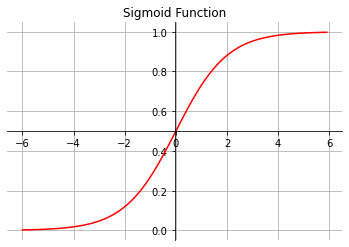

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# define sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

# range of arbitrary x values
x = np.arange(-6,6,.1)

# set figure as desired
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.spines['left'].set_position(('axes',0.5))
ax.spines['bottom'].set_position(('axes',0.5))
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# plot function
plt.grid()
plt.plot(x,sigmoid(x), c='red')
plt.title('Sigmoid Function')

__Step 3__: Binary Classification - These values are then converted to either $0$ or $1$ based on our probability threshold value. This is usually around $0.5$.

### Implementation
#### Insurance Dataset
We will now implement this using an insurance dataset. The data contains the ages of customers and if they did or didnt purchase insurance.

In [27]:
import pandas as pd

data = pd.read_csv("../downloads/insurance_data.csv")
data.head(3)

,age,bought_insurance
0,22,0
1,25,0
2,47,1


We can see the data is stored as $0$ or $1$, $0$ indicating they did not purchase and $1$ indicating they did purchase. Plotting a simple scatter to show us any general trends:

Text(0, 0.5, 'Bought Insurance')

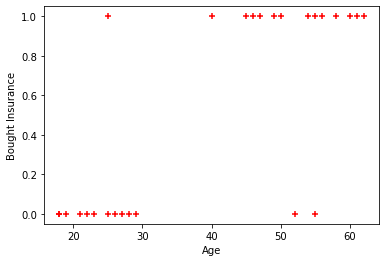

In [28]:
# plot data points
plt.scatter(data.age,data.bought_insurance,marker='+',color='red')
plt.xlabel('Age')
plt.ylabel('Bought Insurance')

We can see that younger customers are less likely to purchase. Now we can apply a model from sklearn.

In [35]:
# split the data into training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, y_test = train_test_split(data[['age']],data.bought_insurance,train_size=0.9,test_size=0.1)

In [36]:
# import logistic regression
from sklearn.linear_model import LogisticRegression
# define the model then fit it with the training data
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [37]:
# run a prediction
model.predict(X_test)

array([0, 0, 1], dtype=int64)

In [39]:
# run accuracy on prediction
model.score(X_test,y_test)

0.6666666666666666

We have a small data set so here one of the predictions was wrong.